# STAT679 Homework7

### Yixuan Wang
#### wang2688@wisc.edu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [28]:
#1.1
from itertools import islice
def primes():
    p=2
    while True:
        if not any(p%x==0 for x in range(2,p)):
            yield p
        p=p+1
alphabet=pd.Series([x for x in islice(primes(),0,10)],index=list('abcdefghij'))

In [30]:
alphabet

a     2
b     3
c     5
d     7
e    11
f    13
g    17
h    19
i    23
j    29
dtype: int64

In [75]:
#1.2
table=[list(range(1,13)),[2,4,4,6,6,8,8,10,10,12,12,14]]
table=np.matrix(table).T
array=[['goat','goat','goat','goat','bird','bird','bird','bird','llama','llama','llama','llama'],
        ['A','A','a','a','A','A','a','a','A','A','a','a'],
        ['A','a','A','a','A','a','A','a','A','a','A','a']]
index=pd.MultiIndex.from_arrays(array,names=['animal','parent1','parent2'])
simple_table=pd.DataFrame(table,index=index,columns=['score1','score2'])

In [76]:
simple_table

score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14

## Problem2

In [2]:
#2.1
iris=pd.read_csv('iris.csv')
print('Data points:', len(iris))
print('Types and names of data:\n',iris.dtypes)
print('Column names:\n',iris.columns)
print('Number of species:',len(iris.groupby('Species')))

Data points: 150
Types and names of data:
 Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object
Column names:
 Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')
Number of species: 3


In [3]:
#2.2
iris.iloc[34,3]=0.2
iris.iloc[37,1]=3.6
iris.iloc[37,2]=1.4
iris.iloc[34:38]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
34,4.9,3.1,1.5,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
37,4.9,3.6,1.4,0.1,setosa


In [4]:
#2.3
iris['Petal.Ratio']=iris['Petal.Length']/iris['Petal.Width']
iris['Sepal.Ratio']=iris['Sepal.Length']/iris['Sepal.Width']
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Ratio,Sepal.Ratio
0,5.1,3.5,1.4,0.2,setosa,7.000000,1.457143
1,4.9,3.0,1.4,0.2,setosa,7.000000,1.633333
2,4.7,3.2,1.3,0.2,setosa,6.500000,1.468750
3,4.6,3.1,1.5,0.2,setosa,7.500000,1.483871
4,5.0,3.6,1.4,0.2,setosa,7.000000,1.388889
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2.260870,2.233333
146,6.3,2.5,5.0,1.9,virginica,2.631579,2.520000
147,6.5,3.0,5.2,2.0,virginica,2.600000,2.166667
148,6.2,3.4,5.4,2.3,virginica,2.347826,1.823529


In [8]:
#2.4
iris.to_csv('iris_corrected.csv')

In [13]:
#2.5
species_agg=iris[['Petal.Ratio','Sepal.Ratio','Species']].groupby('Species').agg([np.mean,np.median,np.min,np.max,np.std]).stack()
species_agg.reset_index(level=0,inplace=True)

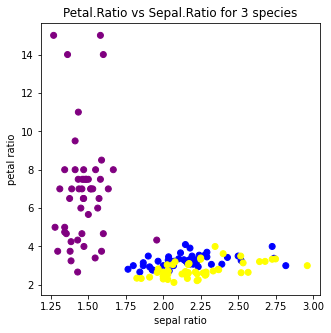

In [6]:
#2.6
color=[]
for item in iris['Species']:
    if item=='setosa':
        color.append('purple')
    elif item=='virginica':
        color.append('yellow')
    elif item=='versicolor':
        color.append('blue')

plt.figure(figsize=(5,5))
plt.scatter(iris['Sepal.Ratio'],iris['Petal.Ratio'],color=color)
plt.title('Petal.Ratio vs Sepal.Ratio for 3 species')
plt.xlabel('sepal ratio')
plt.ylabel('petal ratio')
plt.savefig('iris_scatter.pdf')
plt.show()

## Problem3

In [7]:
#3.1
mlb_df=pd.read_csv('GL2021.txt',header=None)
mlb_df.rename(columns={9:'v_score',10:'h_score',4:'v_league',7:'h_league'},inplace=True)

In [10]:
mlb_df.iloc[:,4:11]

,v_league,5,6,h_league,8,v_score,h_score
0,NL,1,CHN,NL,1,5,3
1,NL,1,CIN,NL,1,11,6
2,NL,1,COL,NL,1,5,8
3,AL,1,MIA,NL,1,1,0
4,AL,1,MIL,NL,1,5,6
...,...,...,...,...,...,...,...
2424,AL,162,KCA,AL,162,7,3
2425,AL,162,NYA,AL,162,0,1
2426,AL,162,SEA,AL,162,7,3
2427,AL,162,TEX,AL,162,6,0


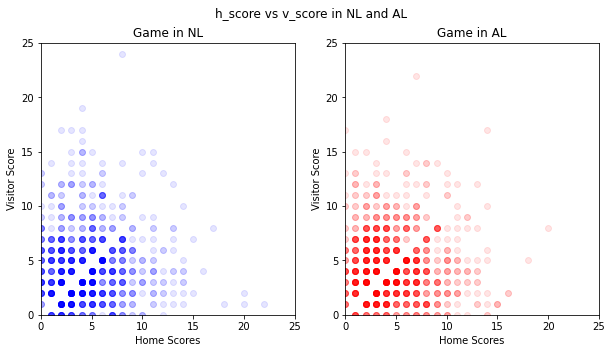

In [11]:
NLAL=[]
for i in range(len(mlb_df)):
    if mlb_df['v_league'][i]==mlb_df['h_league'][i]=='NL':
        NLAL.append(1)
    elif mlb_df['v_league'][i]==mlb_df['h_league'][i]=='AL':
        NLAL.append(-1)
    else:
        NLAL.append(0)
        
mlb_df['NLAL']=NLAL

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(mlb_df[mlb_df['NLAL']==1]['h_score'],mlb_df[mlb_df['NLAL']==1]['v_score'],alpha=0.1,color='blue')
plt.xlim([0,25])
plt.ylim([0,25])
plt.xlabel('Home Scores')
plt.ylabel('Visitor Score')
plt.title('Game in NL')

plt.subplot(122)
plt.scatter(mlb_df[mlb_df['NLAL']==-1]['h_score'],mlb_df[mlb_df['NLAL']==-1]['v_score'],alpha=0.1,color='red')
plt.xlim([0,25])
plt.ylim([0,25])
plt.xlabel('Home Scores')
plt.ylabel('Visitor Score')
plt.title('Game in AL')

plt.suptitle('h_score vs v_score in NL and AL')

plt.savefig('home_away.pdf')

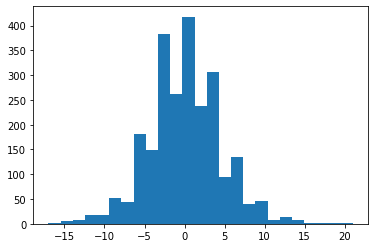

In [30]:
#3.3
mlb_df['score_diff']=mlb_df['h_score']-mlb_df['v_score']
plt.hist(mlb_df['score_diff'],bins=25)
plt.savefig('score_diff.pdf')

In [93]:
#3.4
from scipy.stats import skellam
#estimate the parameter of distribution
lam_h=np.mean(mlb_df['h_score'])
lam_v=np.mean(mlb_df['v_score'])

#generate the frequency from MLB
diff=mlb_df['score_diff']
mlb_df_freq=[]
for item in diff:
    res=len(mlb_df[mlb_df['score_diff']==item])/len(mlb_df)
    mlb_df_freq.append(res)
mlb_freq=pd.DataFrame({'diff':diff,'freq':mlb_df_freq})
mlb_freq.drop_duplicates(inplace=True)
mlb_freq.sort_values(by='diff',inplace=True)
mlb_freq.reset_index(inplace=True)

#select count more than 5
mlb_freq['count']=mlb_freq['freq']*len(mlb_df)
mlb_freq=mlb_freq[mlb_freq['count']>=5]
mlb_freq['freq']=mlb_freq['freq']/sum(mlb_freq['freq'])

#generate pmf
estimated_prob = skellam.pmf(list(mlb_freq['diff']), lam_h, lam_v, loc = 0)
prob=estimated_prob/sum(estimated_prob)

#compare them
from scipy.stats import chisquare
chisquare(f_obs=mlb_freq['freq'],f_exp=prob)

Power_divergenceResult(statistic=1.7484120552567732, pvalue=0.9999999999514365)

The p-value is larger than 0.05, then we don't have enough evidence to reject the null hypothesis that these two dataset are same. So, the dataset is nearly from Skellam distribution.